# Auto-encoder (three-layered CNN) training on MNIST
Almost directly from from-tensorflow.ipynb in the Nengo github, we can modify this network like adding new layers or training on new datasets.

## Import libraries

In [ ]:
%matplotlib inline

import warnings

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## define network

In [ ]:
n_in = 784
n_hidden = 64
minibatch_size = 50

# input
tf_a = tf.keras.Input(shape=(n_in,))

# first layer
tf_b = tf.keras.layers.Dense(
    n_hidden, activation=tf.nn.relu,
    kernel_initializer=tf.initializers.glorot_uniform()
)(tf_a)

# second layer
tf_c = tf.keras.layers.Dense(
    n_in, activation=tf.nn.relu,
    kernel_initializer=tf.initializers.glorot_uniform()
)(tf_b)

In [ ]:
# download MNIST dataset
(train_data, _), (test_data, _) = tf.keras.datasets.mnist.load_data()
# flatten images
train_data = train_data.reshape((train_data.shape[0], -1))
test_data = test_data.reshape((test_data.shape[0], -1))

n_epochs = 2

11493376/11490434 [==============================] - 0s 0us/step


Traing the model

In [ ]:
model = tf.keras.Model(inputs=tf_a, outputs=tf_c)
model.compile(optimizer=tf.optimizers.RMSprop(1e-3), 
              loss=tf.losses.mse)

# run training loop
model.fit(train_data, train_data, epochs=n_epochs)

# evaluate performance on test set
print("Test error:", model.evaluate(test_data, test_data))

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 1219.6470
Epoch 2/2
313/313 [==============================] - 0s 1ms/step - loss: 777.0809
Test error: 777.0808715820312


## display example output and input

Text(0.5, 1.0, 'example input')

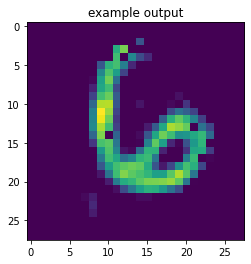

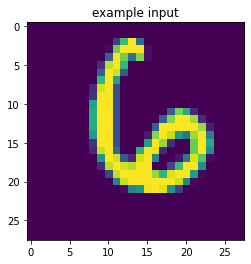

In [ ]:
no_fig = 88
output = model.predict(test_data[[no_fig]])
plt.figure()
plt.imshow(output[0].reshape((28, 28)));
plt.title('example output')
plt.figure()
plt.imshow(test_data[no_fig].reshape((28, 28)))
plt.title('example input')